In [1]:
import numpy as np
import os
import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
% matplotlib inline
import glob
import glob
import numpy as np
import cv2
from tensorflow.keras.models import Model

UsageError: Line magic function `%` not found.


In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K


In [3]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

In [4]:
DATASET_PATH = 'C:/Users/Student/Desktop/Advance Data Mininh/data/'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['C:/Users/Student/Desktop/Advance Data Mininh/data\\blank',
 'C:/Users/Student/Desktop/Advance Data Mininh/data\\fist',
 'C:/Users/Student/Desktop/Advance Data Mininh/data\\five',
 'C:/Users/Student/Desktop/Advance Data Mininh/data\\ok',
 'C:/Users/Student/Desktop/Advance Data Mininh/data\\thumbsdown',
 'C:/Users/Student/Desktop/Advance Data Mininh/data\\thumbsup']

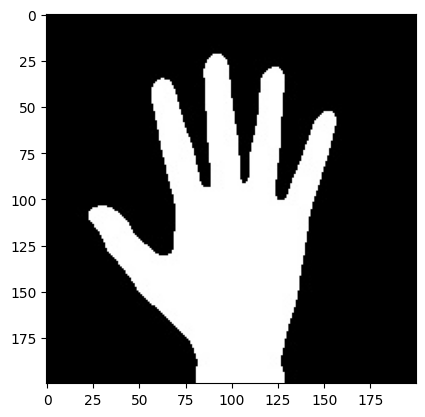

In [5]:
import matplotlib.pyplot as plt

import cv2

cat = cv2.imread('C:/Users/Student/Desktop/Advance Data Mininh/data/five/hand1(984).jpg')
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

C:/Users/Student/Desktop/Advance Data Mininh/data/five/*
2019


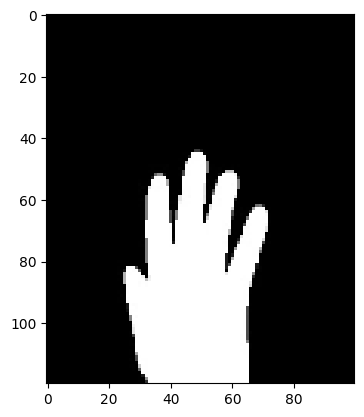

In [6]:
# path to your dataset
DATASET_PATH = 'C:/Users/Student/Desktop/Advance Data Mininh/data/five/'

gesture_path = os.path.join(DATASET_PATH, '*')
print(gesture_path)
import glob
gesture_path = glob.glob(gesture_path)

rand_index = random.randint(0, len(gesture_path))
print(len(gesture_path))
image = cv2.imread(gesture_path[rand_index])
image = cv2.resize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [7]:
import cv2

loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "C:/Users/Student/Desktop/Advance Data Mininh/data/" + str(list_of_gestures[path])
    print(dataset_path)
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    print(len(gest_path))
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,[100, 120])
            loaded_images.append(gray_image)
        k=k+1
    

C:/Users/Student/Desktop/Advance Data Mininh/data/blank
1616
C:/Users/Student/Desktop/Advance Data Mininh/data/ok
1675
C:/Users/Student/Desktop/Advance Data Mininh/data/thumbsup
1618
C:/Users/Student/Desktop/Advance Data Mininh/data/thumbsdown
1641
C:/Users/Student/Desktop/Advance Data Mininh/data/fist
1752
C:/Users/Student/Desktop/Advance Data Mininh/data/five
2019


In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 118, 32)       320       
                                                                 
 batch_normalization_2 (Batc  (None, 98, 118, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 59, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 47, 57, 64)      

In [13]:
outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

len(outputVectors)    

9600

In [14]:
print(len(loaded_images))
print(len(outputVectors))

9600
9600


In [15]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(7680, 120, 100)
(1920, 120, 100)


In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7680, 100, 120, 1)
(7680, 6)
(1920, 100, 120, 1)
(1920, 6)


In [18]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("hand_gesture_recog_model.h5")

Epoch 1/12
60/60 [==============================] - 112s 2s/step - loss: 2.2482 - categorical_accuracy: 0.8116 - val_loss: 0.9876 - val_categorical_accuracy: 0.7552
Epoch 2/12
60/60 [==============================] - 110s 2s/step - loss: 0.1798 - categorical_accuracy: 0.9225 - val_loss: 0.0893 - val_categorical_accuracy: 0.9661
Epoch 3/12
60/60 [==============================] - 110s 2s/step - loss: 0.1554 - categorical_accuracy: 0.9354 - val_loss: 0.0537 - val_categorical_accuracy: 0.9823
Epoch 4/12
60/60 [==============================] - 110s 2s/step - loss: 0.1206 - categorical_accuracy: 0.9449 - val_loss: 0.0407 - val_categorical_accuracy: 0.9880
Epoch 5/12
60/60 [==============================] - 111s 2s/step - loss: 0.0808 - categorical_accuracy: 0.9658 - val_loss: 0.1460 - val_categorical_accuracy: 0.9615
Epoch 6/12
60/60 [==============================] - 110s 2s/step - loss: 0.0946 - categorical_accuracy: 0.9630 - val_loss: 0.0127 - val_categorical_accuracy: 0.9979
Epoch 7/12

In [ ]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras


# Train SVM classifier
extract_features = keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
train_features = extract_features(X_train)
test_features = extract_features(X_test)


# Train SVM model on extracted features
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(train_features, y_train)

# Predict using SVM model
svm_train_pred = svm_model.predict(train_features)
svm_test_pred = svm_model.predict(test_features)

# Calculate accuracy
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print('SVM training accuracy:', svm_train_acc)
print('SVM testing accuracy:', svm_test_acc)

In [2]:
import cv2
import imutils
import numpy as np
from sklearn.metrics import pairwise
from keras.models import load_model


# global variables
bg = None


def run_avg(image, accumWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return

    # compute weighted average, accumulate it and update the background
    cv2.accumulateWeighted(image, bg, accumWeight)


def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)


def _load_weights():
    try:
        model = load_model("hand_gesture_recog_model.h5")
        print(model.summary())
        # print(model.get_weights())
        # print(model.optimizer)
        return model
    except Exception as e:
        return None


def getPredictedClass(model):

    image = cv2.imread('Temp.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, [100, 120])

    gray_image = gray_image.reshape(1, 100, 120, 1)

    prediction = model.predict_on_batch(gray_image)

    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        return "Blank"
    elif predicted_class == 1:
        return "OK"
    elif predicted_class == 2:
        return "Thumbs Up"
    elif predicted_class == 3:
        return "Thumbs Down"
    elif predicted_class == 4:
        return "Punch"
    elif predicted_class == 5:
        return "High Five"


if __name__ == "__main__":
    # initialize accumulated weight
    accumWeight = 0.5

    # get the reference to the webcam
    camera = cv2.VideoCapture(0)

    fps = int(camera.get(cv2.CAP_PROP_FPS))
    # region of interest (ROI) coordinates
    top, right, bottom, left = 10, 350, 225, 590
    # initialize num of frames
    num_frames = 0
    # calibration indicator
    calibrated = False
    model = _load_weights()
    k = 0
    # keep looping, until interrupted
    while (True):
        # get the current frame
        (grabbed, frame) = camera.read()

        # resize the frame
        frame = imutils.resize(frame, width=700)
        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the height and width of the frame
        (height, width) = frame.shape[:2]

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        # to get the background, keep looking till a threshold is reached
        # so that our weighted average model gets calibrated
        if num_frames < 30:
            run_avg(gray, accumWeight)
            if num_frames == 1:
                print("[STATUS] please wait! calibrating...")
            elif num_frames == 29:
                print("[STATUS] calibration successfull...")
        else:
            # segment the hand region
            hand = segment(gray)

            # check whether hand region is segmented
            if hand is not None:
                # if yes, unpack the thresholded image and
                # segmented region
                (thresholded, segmented) = hand

                # draw the segmented region and display the frame
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))

                # count the number of fingers
                # fingers = count(thresholded, segmented)
                if k % (fps / 6) == 0:
                    cv2.imwrite('Temp.png', thresholded)
                    predictedClass = getPredictedClass(model)
                    cv2.putText(clone, str(predictedClass), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

                # show the thresholded image
                cv2.imshow("Thesholded", thresholded)
        k = k + 1
        # draw the segmented hand
        cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)

        # increment the number of frames
        num_frames += 1

        # display the frame with segmented hand
        cv2.imshow("Video Feed", clone)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break

    # free up memory
    camera.release()
    cv2.destroyAllWindows()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 118, 32)       320       
                                                                 
 batch_normalization_2 (Batc  (None, 98, 118, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 59, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 47, 57, 64)      